In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [34]:
train.isnull().values.any()

False

In [35]:
test.isnull().values.any()

False

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357336 entries, 0 to 4357335
Data columns (total 26 columns):
Id                 int64
groupId            int64
matchId            int64
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
maxPlace           int64
numGroups          int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(20)
memory usage: 864.3 MB


In [5]:
train.head(3)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,24,0,0,5,247.30,2,0,4,17,...,1,591.3,0,0.0,0,0,782.4,4,1458,0.8571
1,1,440875,1,1,0,37.65,1,1,0,45,...,0,0.0,0,0.0,0,0,119.6,3,1511,0.0400
2,2,878242,2,0,1,93.73,1,0,2,54,...,1,0.0,0,0.0,0,0,3248.0,5,1583,0.7407


In [6]:
# Drop the irrelevant attributes 
train = train.drop(train.columns[[0, 1, 2]], axis=1)
train.head(3)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,5,247.30,2,0,4,17,1050,2,1,...,1,591.3,0,0.0,0,0,782.4,4,1458,0.8571
1,1,0,37.65,1,1,0,45,1072,1,1,...,0,0.0,0,0.0,0,0,119.6,3,1511,0.0400
2,0,1,93.73,1,0,2,54,1404,0,0,...,1,0.0,0,0.0,0,0,3248.0,5,1583,0.7407


In [56]:
train.describe(include = "all")

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,...,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06
mean,2.656320e-01,9.636856e-01,1.329033e+02,6.901455e-01,2.385866e-01,1.187169e+00,4.703440e+01,1.080898e+03,9.344958e-01,5.547651e-01,...,1.649345e-01,4.238835e+02,2.557985e-03,4.136261e+00,1.388555e-02,5.146264e-03,1.055122e+03,3.457289e+00,1.500504e+03,4.718663e-01
std,6.342160e-01,1.560643e+00,1.699439e+02,1.191514e+00,6.103033e-01,2.366389e+00,2.732772e+01,1.237119e+02,1.566192e+00,7.223452e-01,...,4.672004e-01,1.222927e+03,6.346679e-02,2.757015e+01,1.329266e-01,7.425362e-02,1.116122e+03,2.402109e+00,4.253571e+01,3.079147e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.550000e+02,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+02,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,1.000000e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.334000e+02,2.000000e+00,1.491000e+03,1.979000e-01
50%,0.000000e+00,0.000000e+00,8.776000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,1.029000e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.732000e+02,3.000000e+00,1.500000e+03,4.583000e-01
75%,0.000000e+00,1.000000e+00,1.884000e+02,1.000000e+00,0.000000e+00,1.000000e+00,7.000000e+01,1.126000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.808000e+03,5.000000e+00,1.510000e+03,7.407000e-01
max,2.000000e+01,1.800000e+01,6.384000e+03,6.300000e+01,2.600000e+01,5.900000e+01,1.000000e+02,2.047000e+03,6.000000e+01,1.400000e+01,...,4.100000e+01,4.839000e+04,4.200000e+01,5.286000e+03,6.000000e+00,5.000000e+00,1.730000e+04,7.600000e+01,1.923000e+03,1.000000e+00


In [12]:
#Assign Target labels to a new table
y_train=train['winPlacePerc']
y_train.head(3)

0    0.8571
1    0.0400
2    0.7407
Name: winPlacePerc, dtype: float64

In [13]:
#Assign Predictor variables to X table
x_train=train.loc[:, 'assists':'winPoints']
x_train.head(3)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,5,247.30,2,0,4,17,1050,2,1,...,28,1,591.3,0,0.0,0,0,782.4,4,1458
1,1,0,37.65,1,1,0,45,1072,1,1,...,23,0,0.0,0,0.0,0,0,119.6,3,1511
2,0,1,93.73,1,0,2,54,1404,0,0,...,28,1,0.0,0,0.0,0,0,3248.0,5,1583


In [19]:
print('The average winning percentile is {:.3f}, the median is {:.3f}'.format(y_train.mean(), y_train.median()))

The average winning percentile is 0.472, the median is 0.458


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


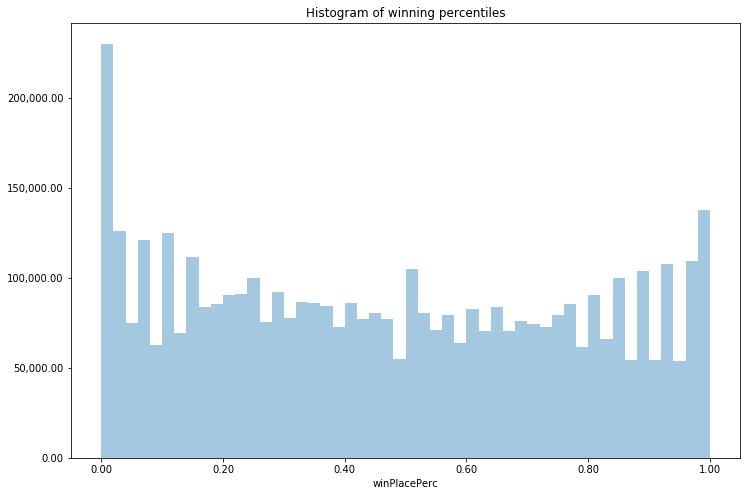

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
formatter = plt.FuncFormatter(lambda y_train, y: '{:,.2f}'.format(y_train))

ax.yaxis.set_major_formatter(formatter=formatter)
ax.xaxis.set_major_formatter(formatter=formatter)

ax.set_title('Histogram of winning percentiles')
sns.distplot(y_train, bins=50, kde=False, ax=ax)

In [14]:
print("The average person kills {:.4f} players, 99% of people have {} kills or less, while the most kills ever recorded is {}."
      .format(train['kills'].mean(),train['kills'].quantile(0.99), train['kills'].max()))

The average person kills 0.9345 players, 99% of people have 7.0 kills or less, while the most kills ever recorded is 60.


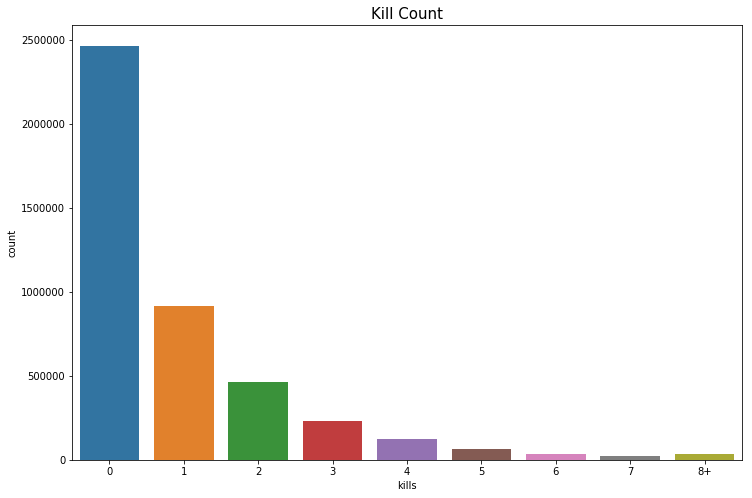

In [32]:
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(12,8))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

In [38]:
print("The average person had {:.4f} damage, 99% of people can't excced {} damage dealt or more, while the highest damage dealt ever recorded is {}."
      .format(train['damageDealt'].mean(),train['damageDealt'].quantile(0.99), train['damageDealt'].max()))

The average person had 132.9033 damage, 99% of people can't excced 775.8 damage dealt or more, while the highest damage dealt ever recorded is 6384.0.


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


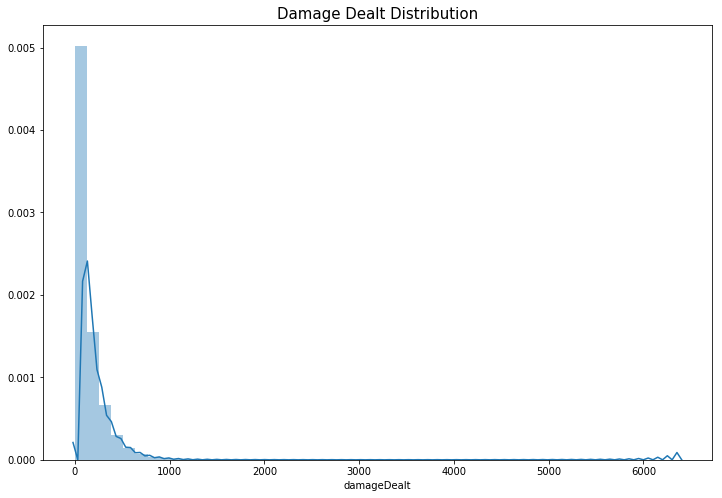

In [37]:
data = train.copy()
plt.figure(figsize=(12,8))
plt.title("Damage Dealt Distribution",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

In [40]:
print("The average person had {:.4f} assist, 99% of people have {} assist or less, while the highest assist ever recorded is {}."
      .format(train['assists'].mean(),train['assists'].quantile(0.99), train['assists'].max()))

The average person had 0.2656 assist, 99% of people have 3.0 assist or less, while the highest assist ever recorded is 20.


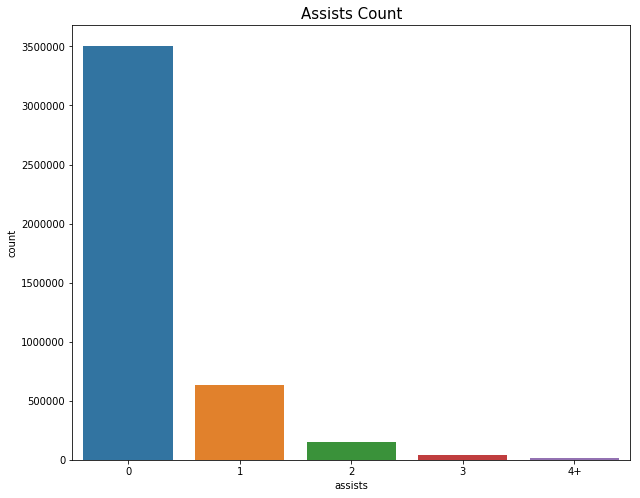

In [45]:
data = train.copy()
data.loc[data['assists'] > data['assists'].quantile(0.99)] = '4+'
plt.figure(figsize=(10,8))
sns.countplot(data['assists'].astype('str').sort_values())
plt.title("Assists Count",fontsize=15)
plt.show()

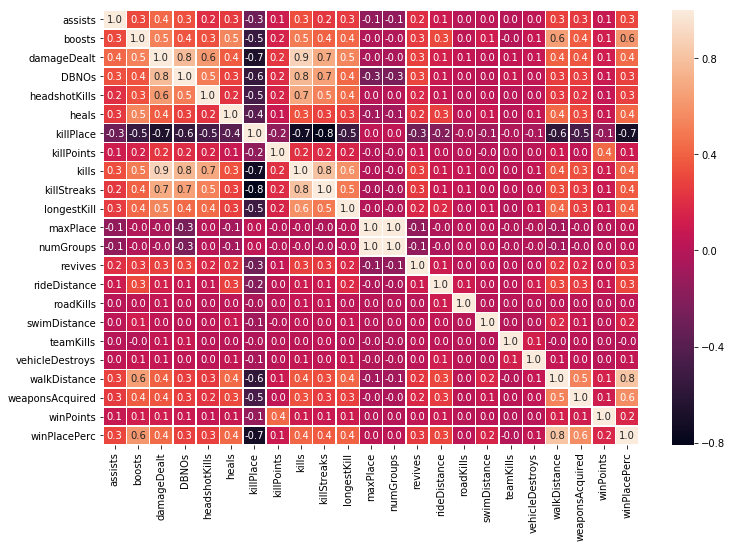

In [58]:
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()